In [1]:
import pickle
from interpret import show
import numpy as np

In [2]:
f = open('EBM2-pregnancy-3pairs-quantile.pkl','rb')
ebm = pickle.load(f)

In [3]:
show(ebm.explain_global())

<!-- http://127.0.0.1:7001/112179719920/ -->

In [4]:
import matplotlib.pyplot as plt

In [5]:
def plot_shape_function_continuous(ebm, feature_name, x_label = None, y_label = None):
    i = ebm.feature_names.index(feature_name)
    plt.figure(figsize=(10,5))
    # get scores in shape functions
    scores = ebm.additive_terms_[i]
    scores[0] = scores[1] # score[0] is redundant
    # get bin edges
    bins = np.zeros(scores.shape)
    bins[1:-1] = ebm.preprocessor_.col_bin_edges_[i]
    bins[0] = ebm.preprocessor_.col_min_[i]
    bins[-1] = ebm.preprocessor_.col_max_[i]
    # plot shape function
    plt.rcParams['font.size'] = '14'
    plt.step(bins,scores,label='pre (default)',alpha=.9)
    plt.hlines([0.0],xmin=bins[0],xmax= bins[-1],colors='r',linestyles='dashed')
    plt.xlim([bins[0],bins[-1]])
    if x_label is None:
        plt.xlabel(feature_name, fontsize=15)
    else:
        plt.xlabel(x_label, fontsize=15)
    if y_label is None:
        plt.ylabel('Score', fontsize=15)
    else:
        plt.ylabel(y_label, fontsize=15)

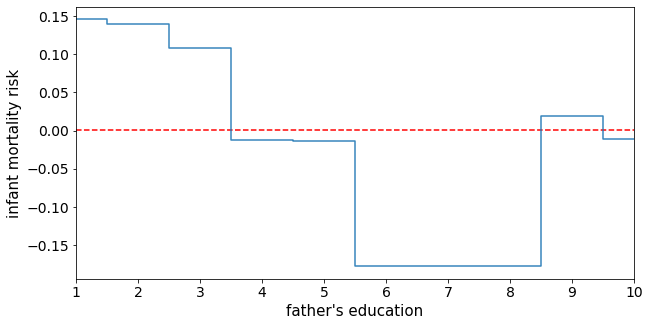

In [6]:
plot_shape_function_continuous(ebm,'feduc', 'father\'s education', 'infant mortality risk')
plt.savefig('InfantMortalityFatherEducation_raw.png', dpi=300)

In [7]:
def plot_shape_function_discrete(ebm, feature_name, x_ticks = None, y_label = None):
    i = ebm.feature_names.index(feature_name)
    plt.figure(figsize=(10,5))
    # get scores in shape functions
    scores = ebm.additive_terms_[i][1:] # ignore score[0]
    # get x for barplot
    x = np.arange(scores.shape[0])+1
    # plot shape function
    plt.rcParams['font.size'] = '14'
    plt.bar(x,scores,alpha=.9,tick_label=x_ticks)
    plt.hlines([0.0],xmin=0.5,xmax= 5.5,colors='r',linestyles='dashed')
    if y_label is None:
        plt.ylabel('Score', fontsize=15)
    else:
        plt.ylabel(y_label, fontsize=15)

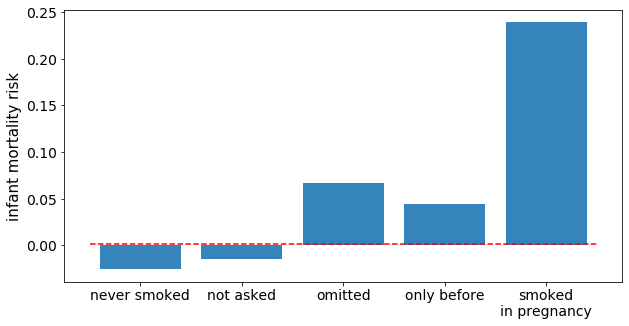

In [8]:
plot_shape_function_discrete(ebm, 'smoking', ['never smoked', 'not asked', 'omitted', 'only before', 'smoked\nin pregnancy'], 'infant mortality risk')
plt.savefig('InfantMortalitySmoking.png', dpi=300)

In [6]:
ebm.preprocessor_.col_mapping_

{4: {'asian': 1, 'black': 2, 'native': 3, 'white': 4},
 5: {'central_south': 1,
  'cuban': 2,
  'mexican': 3,
  'not': 4,
  'other': 5,
  'prican': 6,
  'unknown': 7},
 6: {'no': 1, 'yes': 2},
 7: {'no': 1, 'unknown': 2, 'yes': 3},
 10: {'asian': 1, 'black': 2, 'native': 3, 'unknown': 4, 'white': 5},
 11: {'central_south': 1,
  'cuban': 2,
  'mexican': 3,
  'not': 4,
  'other': 5,
  'prican': 6,
  'unknown': 7},
 16: {'no': 1, 'not asked': 2, 'unknown': 3, 'yes': 4},
 17: {'no': 1, 'not asked': 2, 'unknown': 3, 'yes': 4},
 18: {'unknown': 1, 'what?': 2, 'yes': 3},
 19: {'no': 1, 'not asked': 2, 'unknown': 3, 'yes': 4},
 20: {'no': 1, 'not asked': 2, 'unknown': 3, 'yes': 4},
 21: {'no': 1, 'not asked': 2, 'unknown': 3, 'yes': 4},
 23: {'no': 1, 'not asked': 2, 'unknown': 3, 'yes': 4},
 24: {'no': 1, 'not asked': 2, 'unknown': 3, 'yes': 4},
 25: {'no': 1, 'not asked': 2, 'unknown': 3, 'yes': 4},
 26: {'no': 1, 'not asked': 2, 'unknown': 3, 'yes': 4},
 27: {'no': 1, 'not asked': 2, 'unkno

In [11]:
coefs.shape

(886,)

In [13]:
ebm.preprocessor_.col_bin_counts_[0].sum()

3152611

In [5]:
from pandas import read_csv

data = read_csv('infantMortality2013.cat.csv')

In [6]:
data.columns

Index(['Unnamed: 0', 'dob_yy', 'dob_mm', 'dob_wk', 'dob_tt', 'bfacil', 'mager',
       'mracerec', 'umhisp', 'mar', 'mar_p', 'meduc', 'fagerec11', 'fracerec',
       'ufhisp', 'feduc', 'priorterm', 'lbo_rec', 'tbo_rec', 'precare',
       'uprevis', 'wtgain', 'wic', 'cig_0', 'cig_1', 'cig_2', 'cig_3',
       'rf_diab', 'rf_gest', 'urf_chyper', 'urf_phyper', 'urf_eclam',
       'rf_ppterm', 'rf_ppoutc', 'rf_inftr', 'rf_cesarn', 'rf_fedrg',
       'rf_artec', 'ip_gonn', 'ip_syph', 'ip_chlam', 'ip_hepb', 'ip_hepc',
       'op_cerv', 'uop_tocol', 'op_ecvs', 'op_ecvf', 'on_ruptr', 'uld_precip',
       'on_prol', 'uop_induc', 'ld_augm', 'ld_ster', 'ld_anti', 'ld_chor',
       'uld_meco', 'ld_fint', 'ld_anes', 'uld_breech', 'me_trial', 'ume_forcp',
       'ume_vac', 'DMETH_REC', 'attend', 'pay', 'apgar5', 'dplural',
       'sex_male', 'combgest', 'brthwgt', 'ab_aven1', 'ab_aven6', 'ab_nicu',
       'ab_surf', 'ab_anti', 'ab_seiz', 'ab_binj', 'uca_anen', 'uca_spina',
       'uca_ompha', 'uca_ce

In [7]:
(data['cause_of_death']>0).mean()

0.005876779223521125

In [8]:
# def label_smoking (row):
#     if row['cig_0'] == 99 or row['cig_1'] == 99 or row['cig_2'] == 99 :
#         return 'omitted'
#     if row['cig_0'] == 0 and row['cig_1'] == 0 and row['cig_2'] == 0 :
#         return 'never smoked'
#     if row['cig_0'] == 100 :
#         return 'not asked'
#     if row['cig_0'] > 0 and row['cig_1'] == 0 and row['cig_2'] == 0 :
#         return 'only before'
#     return 'smoked in pregnancy'
data['smoking'] = 'smoked in pregnancy'
data.loc[(data['cig_0'] == 99) | (data['cig_1'] == 99) | (data['cig_2'] == 99), 'smoking'] = 'omitted'
data.loc[(data['cig_0'] == 0) & (data['cig_1'] == 0) & (data['cig_2'] == 0), 'smoking'] = 'never smoked'
data.loc[(data['cig_0'] == 100), 'smoking'] = 'not asked'
data.loc[(data['cig_0'] > 0) & (data['cig_1'] == 0) & (data['cig_2'] == 0), 'smoking'] = 'only before'

In [9]:
# data['precare_rec2'] = 1
# data.loc[np.random.permutation(data.shape[0])[:data.shape[0]//3],'precare_rec2']=0
data['precare_rec'] = data['precare'].apply(lambda x: 1 if x==1 else
                                       2 if x==2 else
                                       3 if x==3 else
                                       4 if x==4 else
                                       5 if x<11 else
                                       6 if x==11 else
                                        7)
data['precare_rec2'] = data['precare_rec'].apply(lambda x: 1 if x<4 else 0)

In [10]:
data = data[ebm.feature_names[:-3]]

In [26]:
N = 50000
idx = np.random.permutation(data.shape[0])[:N]
X = data.loc[idx,:]

In [27]:
ebm.predict(X).mean()

6e-05

In [28]:
featureNames=ebm.feature_names
coefs = list(ebm.intercept_)
bar_idx = []
for i, feature in enumerate(featureNames):
    if ebm.feature_types[i]!='interaction':
        coefs += list(ebm.additive_terms_[i][1:])
        if feature == 'feduc':
            bar_idx.append(len(coefs)-1)
        if feature == 'smoking':
            bar_idx.append(len(coefs)-3)
coefs = np.array(coefs)

In [29]:
coefs.shape

(873,)

In [30]:
def get_onehot(ebm, X):
    featureNames=ebm.feature_names
    n = X.shape[0]
    X_binary = [np.ones((n,1))]
    for i, feature in enumerate(featureNames):
        if ebm.feature_types[i]=='continuous':
            bins = np.array([-10000]+list(ebm.preprocessor_.col_bin_edges_[i])+[ebm.preprocessor_.col_max_[i]])
            x_idx = np.digitize(X[feature],bins,right=True)
#             print(f"{x_idx.min()},{x_idx.max()},{bins.shape[0]}")
            assert(x_idx.min()==1 and x_idx.max()+1==bins.shape[0])
            x_bin_sub = np.zeros((n, x_idx.max()))
            x_bin_sub[np.arange(n),x_idx-1]=1
        elif ebm.feature_types[i]=='categorical':
            x_feature_str = X[feature]
            mapping = ebm.preprocessor_.col_mapping_[i]
            x_feature = np.zeros(X.shape[0]).astype('int')
            for key in mapping:
                if feature == 'sex_male' or feature == 'precare_rec2':
                    x_feature[int(key)==x_feature_str] = mapping[key]
                else:
                    x_feature[key==x_feature_str] = mapping[key]
            x_bin_sub = np.zeros((n, x_feature.max()))
            try:
                x_bin_sub[np.arange(n),x_feature-1]=1
            except:
                print(i,feature,mapping)
        else:
            continue
        X_binary.append(x_bin_sub)
    
    X_binary = np.concatenate(X_binary,1)
    print(X_binary.shape)
    return X_binary

In [31]:
X_binary = get_onehot(ebm, X)

(50000, 873)


In [32]:
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression

def logit_pvalue(model, x_full, coefs, X):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(X)
    n = len(p)
    m = coefs.shape[0]
    ans = np.zeros((m, m))
    for i in range(n):
        if (i+1)%10000==0:
            print(i)
        ans = ans + np.dot(np.transpose(x_full[i:i+1, :],(1,0)), x_full[i:i+1, :]) * p[i,1] * p[i, 0]
    ans/=n
    vcov = np.linalg.pinv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov)/(data.shape[0]*0.8))
    t =  coefs/se
    p_value = (1 - norm.cdf(abs(t))) * 2
    return p_value

In [33]:
p_value = logit_pvalue(ebm, X_binary, coefs, X)

9999
19999
29999
39999
49999


In [34]:
print(f'father education p value: {p_value[bar_idx[0]]}')
print(f'smoking p value: {p_value[bar_idx[1]]}')

father education p value: 0.767691475978147
smoking p value: 0.03024812093415652


In [35]:
print(f'smoking rightmost bar p value: {p_value[bar_idx[1]+2]}')

smoking rightmost bar p value: 0.0
